# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data. 
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will analyze and compare two different representations, Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF). Additionally, you will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various hotels, extracted from Tripadvisor, along with their corresponding ratings.


## Task 1: Data Exploration





1. Load the dataset from the file "hotel_reviews.csv". How many records does the dataset contain? How many distinct classes are there in the dataset?


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset from the file "hotel_reviews.csv".
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("hotel_reviews.csv")

# How many records does the dataset contain?
# Count the number of records
num_records = df.shape[0]
print(f"The dataset contains {num_records} records.")

# How many distinct classes are there in the dataset?
# Count the number of distinct classes in the "Rating" column
num_classes = df['Rating'].nunique()
print(f"There are {num_classes} distinct classes in the dataset.")

The dataset contains 20491 records.
There are 5 distinct classes in the dataset.


2. Determine the top 10 most frequently used words in the dataset. To support your answer, create a bar plot where the x-axis represents words, and the y-axis represents the frequency of each word appearing in the entire dataset.


In [3]:
from collections import Counter
import matplotlib.pyplot as plt

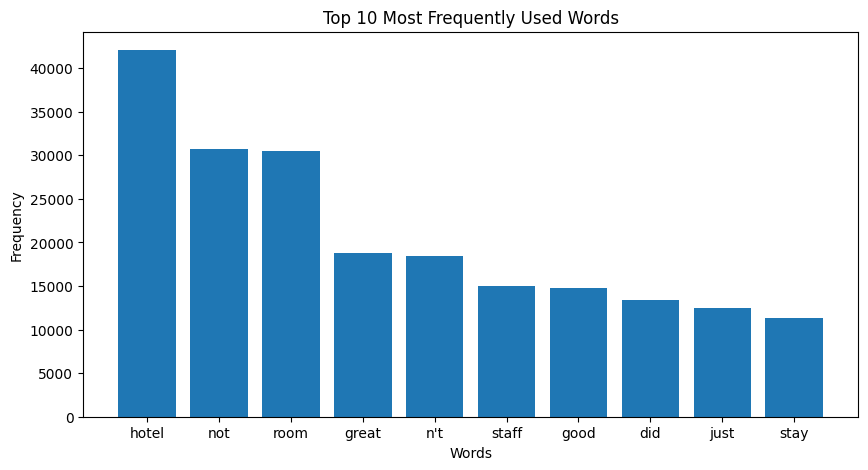

In [4]:
# Combine all the reviews into a single string
all_reviews = ' '.join(df['Review'])

# Convert to lower case and split the string into words
words = all_reviews.lower().split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the 10 most common words
most_common_words = word_counts.most_common(10)

# Separate the words and their counts into two lists
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words')
plt.show()



3. Among the top 10 most frequently used words, identify if there are any stop words included. If we exclude the stop words, would the top 10 most frequent words change? Create another bar plot similar to Question 2, but this time with the stop words removed to illustrate the updated top 10 most frequent words.

In [5]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4579143/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4579143/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4579143/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

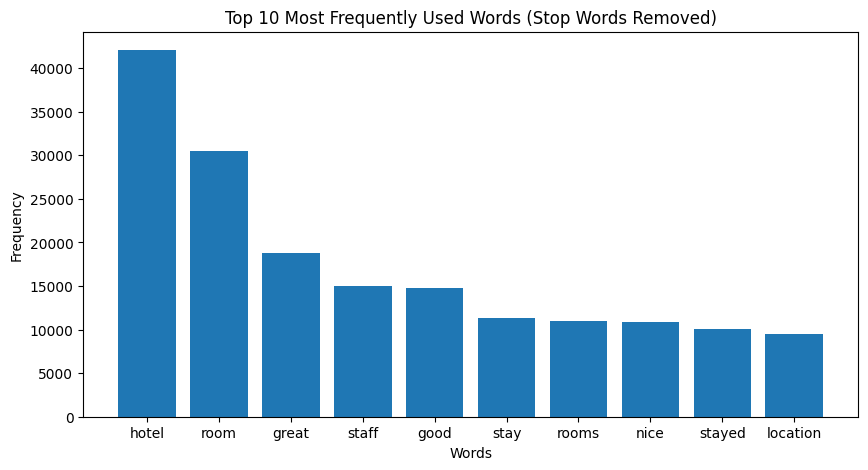

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Load stop words
stop_words = set(stopwords.words('english'))

# Add the contraction "n't" to the set of stop words
stop_words.add("n't")

# Combine all the reviews into a single string
all_reviews = ' '.join(df['Review'])

# Convert to lower case and split the string into words
words = all_reviews.lower().split()

# Filter out the stop words
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Find the 10 most common words
most_common_words = word_counts.most_common(10)

# Separate the words and their counts into two lists
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words (Stop Words Removed)')
plt.show()

Conclusion: Among the top 10 most frequently used words, there are 4 stop words included ("not", "n't", "did", and "just"). If we exclude the stop words, the top 10 most frequent words would change.

## Task 2: Data Preprocessing

- Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.



In [7]:
import re

def clean_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    return text

In [8]:
# Apply the clean_data function to the 'Review' column
df['Review'] = df['Review'].astype(str).apply(clean_data)

- Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Set 'Review' as the feature vector
X = df['Review']

# Set 'Rating' as the label vector
Y = df['Rating']

# Split the dataset into train (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

- Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary. 

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [11]:
import copy

In [12]:
# Create a binary label from the 'Rating' values
def binary_label(rating):
    return 1 if rating in [4, 5] else -1

# Use deepcopy to create copies of Y_train and Y_test
Y_train_copy = copy.deepcopy(Y_train)
Y_test_copy = copy.deepcopy(Y_test)

# Apply the binary_label function to create y_train_binary and y_test_binary
y_train_binary = Y_train_copy.map(binary_label)
y_test_binary = Y_test_copy.map(binary_label)


- Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer with stop words removed
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
train_data_BOW = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
test_data_BOW = vectorizer.transform(X_test)

- Create another numerical representation of the text using Term Frequency-Inverse Document Frequency (TfIdf) and remove the stop words. Save the TfIdf representation in the variables train_data_tfidf and test_data_tfidf.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer with stop words removed
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
train_data_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
test_data_tfidf = tfidf_vectorizer.transform(X_test)

## Task 3: Model Training

Define 3 Logistic Regression models: *model1, model2* and *model3* and train the models as follows:
- Train the first Linear Regression model using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).

- Train the second Linear Regression model using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).

- Train the third Linear Regression model using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary). 

- Make and store predictions on appropriate test sets (X_test_BOW for model1 and X_test_tfidf for model2 and model3)

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression models with a different solver and regularization
model1 = LogisticRegression(max_iter=3000, solver='saga', C=2) 
model2 = LogisticRegression(max_iter=3000, solver='saga', C=2)  
model3 = LogisticRegression(max_iter=3000, solver='saga', C=2)  

# Train the models
model1.fit(train_data_BOW, Y_train)
model2.fit(train_data_tfidf, Y_train)
model3.fit(train_data_tfidf, y_train_binary)

# Make predictions on the test sets
predictions_BOW = model1.predict(test_data_BOW)
predictions_tfidf_rating = model2.predict(test_data_tfidf)
predictions_tfidf_binary = model3.predict(test_data_tfidf)

Comment: The use of `max_iter=3000, solver='saga', C=2` is to increase the Logistic Regression model's iteration count, choose an appropriate solver, and set the regularization strength to enhance the model's performance and convergence capability during training.


## Task 4: Model Evaluation

- Compute and compare the test accuracy of Model 1 (Linear Regression with BoW representation) and Model 2 (Linear Regression with TfIdf representation). Based on your results, determine which embedding method yields higher performance in predicting the hotel ratings (Y).

In [24]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for Model 1 (BoW representation)
accuracy_model1 = accuracy_score(Y_test, predictions_BOW)

# Calculate the accuracy for Model 2 (TfIdf representation)
accuracy_model2 = accuracy_score(Y_test, predictions_tfidf_rating)

# Print the accuracies
print(f"The accuracy for Model 1 (BoW representation): {accuracy_model1:.2f}")
print(f"The accuracy for Model 2 (TfIdf representation): {accuracy_model2:.2f}")

# Determine which embedding method yields higher performance
if accuracy_model1 > accuracy_model2:
    print("BoW representation yields have the higher performance in predicting hotel ratings.")
else:
    print("TfIdf representation yields have the higher performance in predicting hotel ratings.")

The accuracy for Model 1 (BoW representation): 0.60
The accuracy for Model 2 (TfIdf representation): 0.62
TfIdf representation yields have the higher performance in predicting hotel ratings.


- Compute and compare the test accuracy of Model 2 and Model 3. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.

In [25]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for Model 2 (TfIdf representation for multi-class rating prediction)
accuracy_model2 = accuracy_score(Y_test, predictions_tfidf_rating)

# Calculate the accuracy for Model 3 (TfIdf representation for binary sentiment prediction)
accuracy_model3 = accuracy_score(y_test_binary, predictions_tfidf_binary)

# Print the accuracies
print(f"The accuracy of Model 2 (Multi-class rating prediction): {accuracy_model2:.2f}")
print(f"The accuracy of Model 3 (Binary sentiment prediction): {accuracy_model3:.2f}")

# Analyze which task is easier
if accuracy_model3 > accuracy_model2:
    print("Binary sentiment prediction is easier.")
else:
    print("Multi-class rating prediction is easier.")

The accuracy of Model 2 (Multi-class rating prediction): 0.62
The accuracy of Model 3 (Binary sentiment prediction): 0.90
Binary sentiment prediction is easier.




- For Model 2,  compute additional evaluaton measures, namely confusion matrix, precision and recall.  

Classification Report for Model 2:
               precision    recall  f1-score   support

           1       0.79      0.60      0.68       292
           2       0.47      0.40      0.43       333
           3       0.44      0.23      0.30       432
           4       0.54      0.51      0.53      1252
           5       0.69      0.85      0.77      1790

    accuracy                           0.63      4099
   macro avg       0.59      0.52      0.54      4099
weighted avg       0.61      0.63      0.61      4099



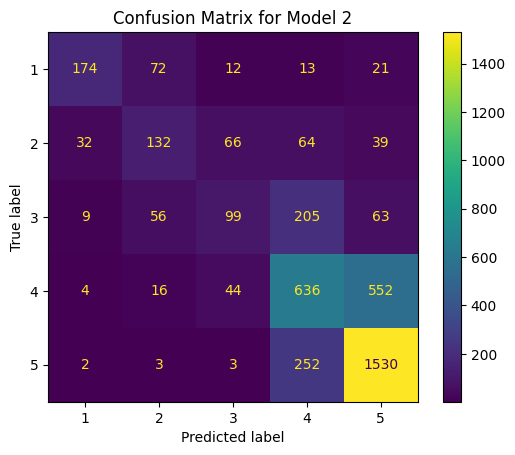

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calculate the confusion matrix for Model 2 (TfIdf representation for multi-class rating prediction)
confusion_matrix_model2 = confusion_matrix(Y_test, predictions_tfidf_rating)

# Print the classification report for Model 2
report = classification_report(Y_test, predictions_tfidf_rating)
print("Classification Report for Model 2:\n", report)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model2, display_labels=model2.classes_)
disp.plot()
plt.title('Confusion Matrix for Model 2')
plt.show()

## Task 5: Model Analysis



- Based on the confusion matrix obtained in the previous question (referring to Model 2, the Linear Regression with TfIdf representation for rating prediction), identify and state the number of samples that were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

In [23]:
# Extract the count of samples classified as rating 5 but actually rating 1
misclassified_as_5_actual_1 = confusion_matrix_model2[0, 4]

# Print the count
print(f"The number of samples misclassified as rating 5 but actually rating 1: {misclassified_as_5_actual_1}")

The number of samples misclassified as rating 5 but actually rating 1: 21


- Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 2.

1. Precision: Precision tells us how many of the items identified as positive are actually positive. It is crucial in situations where false positives are undesirable. 

Precision = True Positives/(True Positives + False Positives)

2. Recall: Recall (or Sensitivity) tells us how many of the actual positive cases we caught through our classification. It is crucial in situations where missing a positive case is not acceptable.

Recall = True Positives/(True Positives + False Negatives)

3. F1 Score: The F1 Score is the harmonic mean of Precision and Recall and provides a single metric that balances the trade-off between Precision and Recall. 

F1 = (2 x Precision x Recall)/(Precision + Recall)

The most suitable evaluation metric for Model 2 would depend on the specific business context:

1. If it is critical not to over-promise by giving high ratings to hotels that don't deserve them (to maintain customer trust, for example), then Precision may be the most suitable metric.

2. If it is more important to ensure that all good hotels are identified, even at the risk of including some lower-quality ones, then Recall may be more appropriate.

3. If there's a need to balance both concerns, then the F1 score could be the most appropriate metric.


- For binary sentiment prediction (Model 3), visualize important words with their model coefficients.  

*Tip: you can reuse the function plot_coefficients from prac. session.*

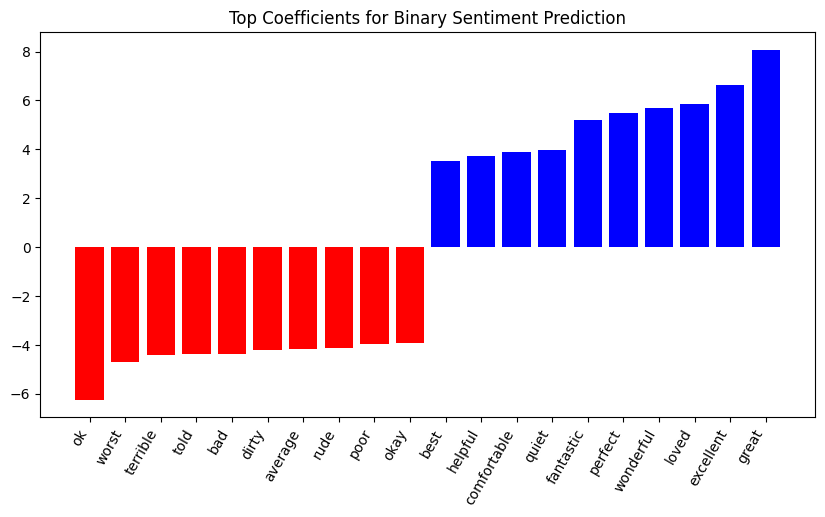

In [21]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_n=10):
    # Get coefficients from the classifier
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_n:]
    top_negative_coefficients = np.argsort(coef)[:top_n]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # Plot the top coefficients
    plt.figure(figsize=(10, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_n), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_n), feature_names[top_coefficients], rotation=60, ha="right")
    plt.title("Top Coefficients for Binary Sentiment Prediction")
    plt.show()

# Get the feature names from the TfIdf vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Call the function to visualize coefficients for Model 3
plot_coefficients(model3, feature_names, top_n=10)